In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk, nltk.stem.porter
import scipy.io as scio
from sklearn import svm, datasets

In [2]:
def visualize_boundary(clf, X, X_min, X_max, y_min, y_max):
    h = .02
    xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))

    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contour(xx, yy, z, levels=[0], colors='r')

In [3]:
def gaussian_kernel(X1, X2, sigma):
    X1 = X1.flatten()
    X2 = X2.flatten()

    sim = 0

    # ===================== Your Code Here =====================
    # Instructions : Fill in this function to return the similarity between x1
    #                and x2 computed using a Gaussian kernel with bandwith sigma
    #

    sim = np.exp(np.sum((X1 - X2) ** 2) / (-2 * sigma ** 2))

    # ==========================================================

    return sim

In [4]:
def plot_data(X, y):
    # ===================== Your Code Here =====================
    # Instructions : Plot the positive and negative examples on a
    #                2D plot, using the marker="+" for the positive
    #                examples and marker="o" for the negative examples
    #

    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]

    plt.scatter(X[pos, 0], X[pos, 1], marker='+')
    plt.scatter(X[neg, 0], X[neg, 1], marker='o', s=15)

    # ==========================================================

In [5]:
def email_feature(word_indices):
    # Total number of words in the dictionary
    n = 1899

    # You need to return the following variables correctly.
    # Since the index of numpy array starts at 0, to align with the word indices we make n + 1 size array
    features = np.zeros(n + 1)

    # ===================== Your Code Here =====================
    # Instructions : Fill in this function to return a feature vector for the
    #                given email (word_indices). To help make it easier to
    #                process the emails, we have already pre-processed each
    #                email and converted each word in the email into an index in
    #                a fixed dictionary (of 1899 words). The variable
    #                word_indices contains the list of indices of the words
    #                which occur in one email.
    #
    #                Concretely, if an email has the text:
    #
    #                   The quick brown fox jumped over the lazy dog.
    #
    #                Then, the word_indices vector for this text might look
    #                like:
    #
    #                   60  100   33  44  10      53  60  58  5
    #
    #                where, we have mapped each word onto a number, for example:
    #
    #                   the     --  60
    #                   quick   --  100
    #                   ...
    #
    #                Your task is take one such word_indices vector and construct
    #                a binary feature vector that indicates whether a particular
    #                word occurs in the email. That is, features[i] = 1 when word i
    #                is present in the email. Concretely, if the word 'the' (say,
    #                index 60) appears in the email, then features[60] = 1. The feature
    #                vector should look like:
    #
    #                features = [0, 0, 0, 0, 1, 0, 0, 0, ... 0, 0, 0, 1, ... 0, 0, 0, 1, 0]
    #
    #

    features[word_indices - 1] = 1

    # ==========================================================

    return features

In [6]:
def get_vocab_list():
    vocab_dict = {}

    with open('/content/drive/MyDrive/Coursera_ML/Exer_6/vocab.txt') as f:
        for line in f:
            val, key = line.split()
            vocab_dict[key] = int(val)
    
    return vocab_dict

In [7]:
def process_email(email_contents):
    vocab_list = get_vocab_list()

    word_indices = np.array([], dtype=np.int64)

    # ===================== Preprocess Email =====================

    email_contents = email_contents.lower()

    email_contents = re.sub('<[^<>]+>', ' ', email_contents)

    # Any numbers get replaced with the string 'number'
    email_contents = re.sub('[0-9]+', 'number', email_contents)

    # Anything starting with http or https:// replaced with 'httpaddr'
    email_contents = re.sub('(http|https)://[^\s]*', 'httpaddr', email_contents)

    # Strings with "@" in the middle are considered emails --> 'emailaddr'
    email_contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_contents)

    # The '$' sign gets replaced with 'dollar'
    email_contents = re.sub('[$]+', 'dollar', email_contents)

    # ===================== Tokenize Email =====================

    # Output the email
    print('==== Processed Email ====')

    stemmer = nltk.stem.porter.PorterStemmer()

    tokens = re.split('[@$/#.-:&*+=\[\]?!(){\},\'\">_<;% ]', email_contents)

    for token in tokens:
        token = re.sub('[^a-zA-Z0-9]', '', token)
        token = stemmer.stem(token)

        if len(token) < 1:
            continue

        # ===================== Your Code Here =====================
        # Instructions : Fill in this function to add the index of token to
        #                word_indices if it is in the vocabulary. At this point
        #                of the code, you have a stemmed word frome email in
        #                the variable token. You should look up token in the
        #                vocab_list. If a match exists, you should add the
        #                index of the word to the word_indices nparray.
        #                Concretely, if token == 'action', then you should
        #                look up the vocabulary list the find where in vocab_list
        #                'action' appears. For example, if vocab_list[18] == 'action'
        #                then you should add 18 to the word_indices array.

        if token in vocab_list:
            word_indices = np.append(word_indices, vocab_list[token])

        # ==========================================================

        print(token)

    print('==================')

    return word_indices

# ex6

## Part 1: Loading and Visualizing Data

In [8]:
# Load from ex6data1
data = scio.loadmat('/content/drive/MyDrive/Coursera_ML/Exer_6/ex6data1.mat')
X, y = data['X'], data['y'].flatten()
m = y.size

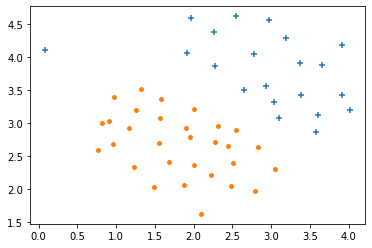

In [9]:
# Plot training data
plot_data(X, y)

## Part 2: Training Linear SVM

In [10]:
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)

C = 1000
clf = svm.SVC(C=C, kernel='linear', tol=1e-3)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


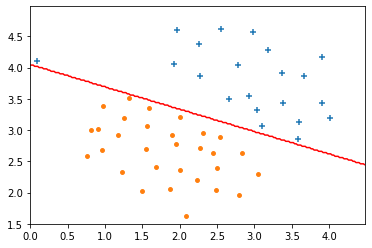

In [11]:
plot_data(X, y)
visualize_boundary(clf, X, 0, 4.5, 1.5, 5)

## Part 3: Implementing Gaussian Kernel

In [12]:
X1 = np.array([1, 2, 1])
X2 = np.array([0, 4, -1])
sigma = 2
sim = gaussian_kernel(X1, X2, sigma)

In [13]:
print('Gaussian kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = {} : {:0.6f}\n'
      '(for sigma = 2, this value should be about 0.324652'.format(sigma, sim))

Gaussian kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2 : 0.324652
(for sigma = 2, this value should be about 0.324652


## Part 4: Visualizing Dataset 2

In [14]:
# Load from ex6data2
data = scio.loadmat('/content/drive/MyDrive/Coursera_ML/Exer_6/ex6data2.mat')
X, y = data['X'], data['y'].flatten()
m = y.size


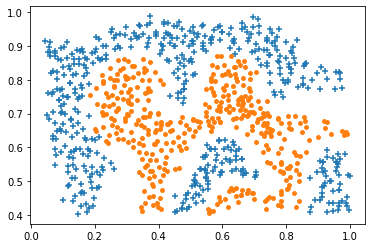

In [15]:
# Plot training data
plot_data(X, y)

## Part 5: Training SVM with RBF Kernel (Dataset 2)

In [16]:
C = 1
sigma = 0.1

In [17]:
def gaussian_kernel_func(X1, X2, sigma):
    n1, n2 = X1.shape[0], X2.shape[0]
    result = np.zeros((n1, n2))

    for i in range(n1):
        for j in range(n2):
            result[i, j] = gaussian_kernel(X1[i], X2[j], sigma)
    
    return result

In [18]:
clf = svm.SVC(C=C, kernel='rbf', gamma=np.power(sigma, -2))
clf.fit(X, y)

SVC(C=1, gamma=99.99999999999999)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


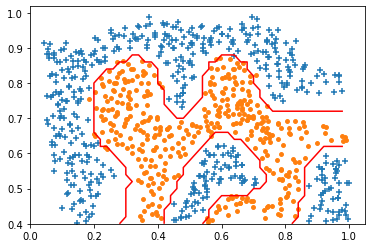

In [19]:
plot_data(X, y)
visualize_boundary(clf, X, 0, 1, .4, 1.0)

## Part 6: Visualizing Dataset 3

In [20]:
# Load from ex6data3
data = scio.loadmat('/content/drive/MyDrive/Coursera_ML/Exer_6/ex6data3.mat')
X, y = data['X'], data['y'].flatten()
m = y.size

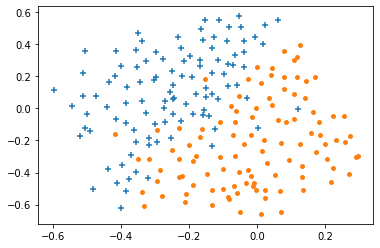

In [21]:
plot_data(X, y)

## Part 7: Visualizing Dataset 3

In [22]:
clf = svm.SVC(C=C, kernel='rbf', gamma=np.power(sigma, -2))
clf.fit(X, y)

SVC(C=1, gamma=99.99999999999999)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


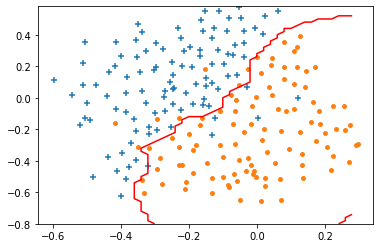

In [23]:
plot_data(X, y)
visualize_boundary(clf, X, -.5, .3, -.8, .6)

# ex6_spam

## Part 1: Email Preprocessing

In [24]:
file_contents = open('/content/drive/MyDrive/Coursera_ML/Exer_6/emailSample1.txt', 'r').read()
word_indices = process_email(file_contents)

==== Processed Email ====
anyon
know
how
much
it
cost
to
host
a
web
portal
well
it
depend
on
how
mani
visitor
you
re
expect
thi
can
be
anywher
from
less
than
number
buck
a
month
to
a
coupl
of
dollarnumb
you
should
checkout
httpaddr
or
perhap
amazon
ecnumb
if
your
run
someth
big
to
unsubscrib
yourself
from
thi
mail
list
send
an
email
to
emailaddr


In [25]:
# Print stats
print('Word Indices: ')
print(word_indices)

Word Indices: 
[  86  916  794 1077  883  370 1699  790 1822 1831  883  431 1171  794
 1002 1893 1364  592 1676  238  162   89  688  945 1663 1120 1062 1699
  375 1162  479 1893 1510  799 1182 1237  810 1895 1440 1547  181 1699
 1758 1896  688 1676  992  961 1477   71  530 1699  531]


## Part 2: Feature Extraction

In [26]:
features = email_feature(word_indices)

In [27]:
# Print stats
print('Length of feature vector: {}'.format(features.size))
print('Number of non-zero entries: {}'.format(np.flatnonzero(features).size))

Length of feature vector: 1900
Number of non-zero entries: 45


## Part 3: Train Linear SVM for Spam Classification

In [28]:
# Load the Spam Email dataset
# You will have X, y in your environment
data = scio.loadmat('/content/drive/MyDrive/Coursera_ML/Exer_6/spamTrain.mat')
X, y = data['X'], data['y'].flatten()

In [29]:
print('Training Linear SVM (Spam Classification)')
print('(this may take 1 to 2 minutes)')

Training Linear SVM (Spam Classification)
(this may take 1 to 2 minutes)


In [30]:
C = 0.1
clf = svm.SVC(C=C, kernel='linear')
clf.fit(X, y)

SVC(C=0.1, kernel='linear')

In [31]:
p = clf.predict(X)

In [32]:
print('Training Accuracy: {}'.format(np.mean(p == y) * 100))

Training Accuracy: 99.825


## Part 4: Test Spam Classification

In [33]:
# Load the test dataset
data = scio.loadmat('/content/drive/MyDrive/Coursera_ML/Exer_6/spamTest.mat')
Xtest, ytest = data['Xtest'], data['ytest'].flatten()

In [34]:
p = clf.predict(Xtest)

In [35]:
print('Test Accuracy: {}'.format(np.mean(p == ytest) * 100))

Test Accuracy: 98.9


## Part 5: Top Predictors of Spam

In [36]:
vocab_list = get_vocab_list()
indices = np.argsort(clf.coef_).flatten()[::-1]
print(indices)

[1190  297 1397 ... 1764 1665 1560]


In [37]:
for i in range(15):
    for key in vocab_list:
        if vocab_list[key] == indices[i]:
            print('{} ({:0.6f})'.format(key, clf.coef_.flatten()[indices[i]]))


otherwis (0.500614)
clearli (0.465916)
remot (0.422869)
gt (0.383622)
visa (0.367710)
base (0.345064)
doesn (0.323632)
wife (0.269724)
previous (0.267298)
player (0.261169)
mortgag (0.257298)
natur (0.253941)
ll (0.253467)
futur (0.248297)
hot (0.246404)
